In [1]:
import numpy as np
import seaborn as sns
import pandas
import matplotlib.pyplot as plt

data = pandas.read_csv('Crime_Data_from_2010_to_Present.csv')

In [2]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


# Victims Analysis

Victims Age

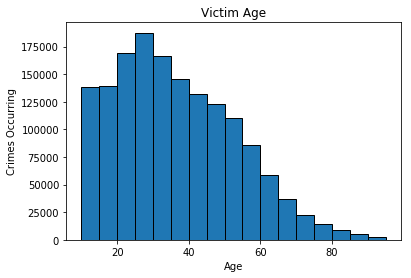

In [3]:
fig, ax = plt.subplots()
bins = np.arange(data['Victim Age'].min(),data['Victim Age'].max(),5)
plt.hist(data['Victim Age'].dropna(), bins=bins, alpha = 1, edgecolor='black')
ax.set_title("Victim Age")
ax.set_xlabel("Age")
ax.set_ylabel("Crimes Occurring")
plt.show()

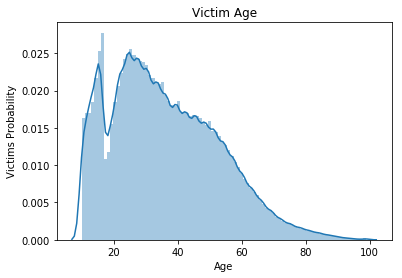

In [5]:
fig, ax = plt.subplots()
sns.distplot(data["Victim Age"].dropna(), bins=90, ax=ax)
ax.set_title("Victim Age")
ax.set_xlabel("Age")
ax.set_ylabel("Victims Probability")
plt.show()

In [4]:
data["Victim Age"].describe()[1:]

mean    35.965905
std     16.811839
min     10.000000
25%     23.000000
50%     34.000000
75%     48.000000
max     99.000000
Name: Victim Age, dtype: float64

Victims Sex

In [6]:
data['Victim Sex'].value_counts()

M    784098
F    715645
X     28441
H        56
-         1
Name: Victim Sex, dtype: int64

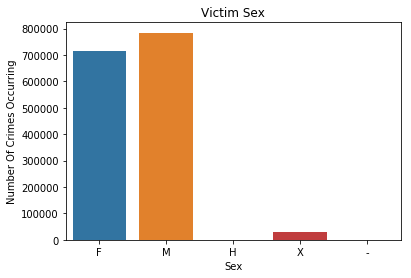

In [7]:
fig, ax = plt.subplots()
sns.countplot('Victim Sex',data=data)
ax.set_title("Victim Sex")
ax.set_xlabel("Sex")
ax.set_ylabel("Number Of Crimes Occurring")
plt.show()

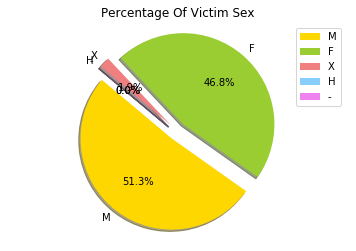

In [16]:
fig, ax = plt.subplots()
labels = 'M','F','X','H','-'
sizes = [784098, 715645, 28441, 56, 1]
colors = ['gold', 'yellowgreen','lightcoral','lightskyblue','violet']
explode= (0.1,0.1,0.1,0.1,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_title("Percentage Of Victim Sex") 
plt.axis('equal')
plt.legend()
plt.show()

Victims Descent

In [18]:
Victims_descent = {
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}
data["Victim Descent"] = data["Victim Descent"].map(Victims_descent)

In [19]:
data['Victim Descent'].value_counts()

Hispanic/Latin/Mexican            582840
White                             414424
Black                             269782
Other                             162664
Unknown                            47013
Other Asian                        39648
Korean                              7531
Filipino                            1981
American Indian/Alaskan Native       711
Chinese                              645
Pacific Islander                     292
Japanese                             248
Hawaiian                             156
Vietnamese                            91
Guamanian                             69
Asian Indian                          58
Samoan                                26
Cambodian                             15
Laotian                               10
Name: Victim Descent, dtype: int64

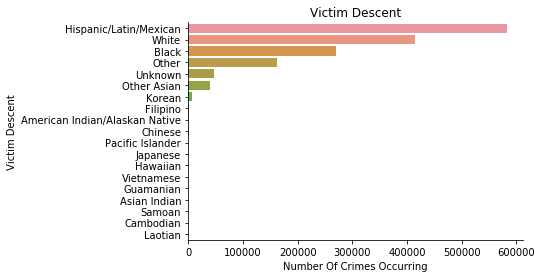

In [23]:
fig, ax = plt.subplots()
sns.barplot(data['Victim Descent'].value_counts(), data['Victim Descent'].value_counts().index,ax=ax)
ax.set_title("Victim Descent")
ax.set_ylabel("Victim Descent")
ax.set_xlabel("Number Of Crimes Occurring")
sns.despine()
plt.show()

Choose the Victims descent which has the number of Crimes occuring larger than 5000

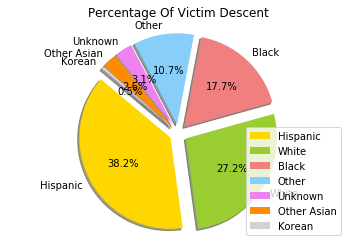

In [25]:
fig, ax = plt.subplots()
labels = 'Hispanic','White','Black','Other','Unknown','Other Asian','Korean'
sizes = [582840, 414424, 269782, 162664, 47013, 39648, 7531]
colors = ['gold', 'yellowgreen','lightcoral','lightskyblue','violet','darkorange','lightgrey']
explode= (0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_title("Percentage Of Victim Descent") 
plt.axis('equal')
plt.legend()
plt.show()